<a href="https://colab.research.google.com/github/arjunk220401/Arjunkumar2204/blob/main/devp2_test_nb_2023_24_045012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FORE School of Management

## Data Exploration & Vizualization using Python - II: Test
## AY: 2023-24 | Term: 02 | Batch: PGDM BDA-04 | Section: H | Faculty: Prof. Amarnath Mitra

### Total Marks: 70 | Exam Duaration: 01 Hrs | Number of Questions: 12 {Part A: 3 | Part B: 2 | Part C: 4 | Part D: 3}

### Note
### 1. Edit the Filename: "devp2_test_nb_2023-24_xxxx.ipynb" with "xxxx" as Student Roll Number
### 2. Answer to a Question must be given in the Cells below the Question.
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### 'Double-Click' & Edit the Following with One's Name & Roll Number

#### Student Name : Arjun Kumar
#### Student Roll Number : 045012

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### Required Python Libraries

In [ ]:
# Required Python Libraries
"""
Input/Output: os
Data Manipulation: pandas
Visualization: matplotlib, seaborn
Statistical Analysis: numpy, scipy, statsmodels
"""
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as sps
import statsmodels as sm
import statsmodels.formula.api as smf

### Import Exam Dataset & Create Student Specific Random & Unique Data Sample

In [ ]:
# Define File path : Replace xxxxx with appropriate File Path
#file_path = r'/content/DEVP-II_TEST_DATASET (2).csv'

# Import & Read Dataset
df = pd.read_csv("DEVP-II_TEST_DATASET (2).csv")

# Display Dataset Information
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_Id             10000 non-null  int64  
 1   Country                 10000 non-null  object 
 2   Gender                  10000 non-null  object 
 3   Age                     10000 non-null  int64  
 4   Yearly_Average_Salary   10000 non-null  int64  
 5   Yearly_Average_Balance  10000 non-null  int64  
 6   Credit_Score            10000 non-null  int64  
 7   Tenure_Years            10000 non-null  int64  
 8   Product_Category        10000 non-null  int64  
 9   Credit_Card             10000 non-null  object 
 10  Active_Member           10000 non-null  object 
 11  Customer_Churn          10000 non-null  object 
 12  Unnamed: 12             0 non-null      float64
 13  Unnamed: 13             0 non-null      float64
 14  Unnamed: 14             0 non-null     

#### Create Student Specific Unique Dataset - In the Code below:

##### 1. Replace 'roll_number_last_4_digit' with Last 4 Digits of your Roll Number
##### 2. Replace 'roll_number' with your Roll Number (non-zero part)

#### Example : If the Roll Number is 012345 then use:
##### 1. n = roll_number_last_4_digit = 2345
##### 2. random_state = roll_number = 12345 (the non-zero part)

In [ ]:
# Create Student Specific Unique Dataset

"""
Example:
Student's Roll Number = 012345
my_df = df.sample (n = 2345, random_state = 12345, ignore_index = True)
"""

my_df = df.sample (n = 5012, random_state = 45012, ignore_index = True)

# Display Sample Information
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_Id             5012 non-null   int64  
 1   Country                 5012 non-null   object 
 2   Gender                  5012 non-null   object 
 3   Age                     5012 non-null   int64  
 4   Yearly_Average_Salary   5012 non-null   int64  
 5   Yearly_Average_Balance  5012 non-null   int64  
 6   Credit_Score            5012 non-null   int64  
 7   Tenure_Years            5012 non-null   int64  
 8   Product_Category        5012 non-null   int64  
 9   Credit_Card             5012 non-null   object 
 10  Active_Member           5012 non-null   object 
 11  Customer_Churn          5012 non-null   object 
 12  Unnamed: 12             0 non-null      float64
 13  Unnamed: 13             0 non-null      float64
 14  Unnamed: 14             0 non-null      

## -------------------- Part A : Data Description & Statistics [14 Marks] --------------------

#### Use 'my_df' Dataset to Perform the following Tasks & Explain:
##### 1. Identify the Nominal, Categorical, Ordinal & Continuous Variables in the Data. [02 + 02 + 02 + 02 = 08 marks]
##### 2. Display the Descriptive Statistics for all Non-Categorical Variables. [02 marks]
##### 3. Display the Descriptive Statistics for any 02 Categorical Variables. [02 + 02 = 04 marks]

In [ ]:
# A1.

# Identify variable types
nominal_variables = []     # Nominal variables
categorical_variables = [] # Categorical variables
ordinal_variables = []     # Ordinal variables
continuous_variables = []  # Continuous variables

# Iterate through each column in the DataFrame
for column in my_df.columns:
    unique_values = my_df[column].nunique()

    # Based on the number of unique values and data type, categorize the variable
    if unique_values == 2:
        nominal_variables.append(column)
    elif df[column].dtype == 'object':
        categorical_variables.append(column)
    elif unique_values < 10:  # You can adjust this threshold based on your data
        ordinal_variables.append(column)
    else:
        continuous_variables.append(column)

# Print the identified variable types
print("\nNominal Variables:", nominal_variables)
print("Categorical Variables:", categorical_variables)
print("Ordinal Variables:", ordinal_variables)
print("Continuous Variables:", continuous_variables)

#Analysis#

#Analyzing the given set of variables reveals a diverse mix of data types. We have:

#Nominal: A single variable, "Country," represents categories without inherent order, such as nationality. It can only be used for groupings and comparisons, not calculations.

#Ordinal: "Tenure_Years" provides ranked levels (e.g., years active). While order matters, the distance between levels might not be consistent (e.g., 1 year vs. 5 years). Its analysis involves considering order but not assuming equal intervals.

#Continuous: Four variables like "Age" and "Credit_Score" represent values along a continuous spectrum. They allow for calculations like averages, differences, and correlations.

#Categorical: These variables like "Gender" and "Customer_churn" capture distinct groupings, often with binary options (e.g., male/female, churned/active). While similar to nominal, they can potentially hold additional meaning beyond just labels (e.g., gender might relate to specific demographics).

#Understanding these distinctions is crucial for choosing appropriate statistical methods and interpretations. Continuous variables can undergo more intricate analyses compared to nominal or ordinal ones. Similarly, ordinal data requires specific techniques that respect its ranked nature.

#This diversity offers various avenues for exploration. Nominal features can be used for segmenting and characterizing groups, while continuous ones enable deeper relationships and trends. Ordinal data allows for exploring ordered patterns and their potential influences.


Nominal Variables: ['Gender', 'Credit_Card', 'Active_Member', 'Customer_Churn']
Categorical Variables: ['Country']
Ordinal Variables: ['Product_Category', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28']
Continuous Variables: ['Customer_Id', 'Age', 'Yearly_Average_Salary', 'Yearly_Average_Balance', 'Credit_Score', 'Tenure_Years']


Analysis

Analyzing the given set of variables reveals a diverse mix of data types. We have:

Nominal: A single variable, "Country," represents categories without inherent order, such as nationality. It can only be used for groupings and comparisons, not calculations.

Ordinal: "Tenure_Years" provides ranked levels (e.g., years active). While order matters, the distance between levels might not be consistent (e.g., 1 year vs. 5 years). Its analysis involves considering order but not assuming equal intervals.

Continuous: Four variables like "Age" and "Credit_Score" represent values along a continuous spectrum. They allow for calculations like averages, differences, and correlations.

Categorical: These variables like "Gender" and "Customer_churn" capture distinct groupings, often with binary options (e.g., male/female, churned/active). While similar to nominal, they can potentially hold additional meaning beyond just labels (e.g., gender might relate to specific demographics).

Understanding these distinctions is crucial for choosing appropriate statistical methods and interpretations. Continuous variables can undergo more intricate analyses compared to nominal or ordinal ones. Similarly, ordinal data requires specific techniques that respect its ranked nature.

This diversity offers various avenues for exploration. Nominal features can be used for segmenting and characterizing groups, while continuous ones enable deeper relationships and trends. Ordinal data allows for exploring ordered patterns and their potential influences

In [ ]:
# A2.

non_categorical_stats = my_df[['Age', 'Yearly_Average_Salary', 'Yearly_Average_Balance', 'Credit_Score', 'Tenure_Years']].describe()
non_categorical_stats

,Age,Yearly_Average_Salary,Yearly_Average_Balance,Credit_Score,Tenure_Years
count,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000
mean,38.857542,99954.480646,75754.727454,648.470072,5.007183
std,10.420976,57163.588704,62285.598511,96.056950,2.884172
min,18.000000,12.000000,0.000000,350.000000,0.000000
25%,32.000000,51581.750000,0.000000,582.000000,2.000000
50%,37.000000,99691.000000,96943.500000,650.000000,5.000000
75%,44.000000,149147.000000,126874.500000,714.000000,7.000000
max,92.000000,199992.000000,250898.000000,850.000000,10.000000


In [ ]:
# A3.

# Display Descriptive Statistics for 2 Categorical Variables
categorical_stats_1 = my_df['Gender'].value_counts()
print(f'Gender Distribution:\n{categorical_stats_1}\n')

categorical_stats_2 = my_df['Active_Member'].value_counts()
print(f'Active Member Distribution:\n{categorical_stats_2}')



Gender Distribution:
Male      2757
Female    2255
Name: Gender, dtype: int64

Active Member Distribution:
Yes    2581
No     2431
Name: Active_Member, dtype: int64


Analysis:


Let's analyze the data on gender distribution and active member distribution:

Gender Distribution:

Male: 2757

Female: 2255

Analysis:

The dataset has more males (2757) than females (2255).
The distribution is not perfectly balanced, with a higher count of males.
Active Member Distribution:

Yes: 2581

No: 2431

Analysis:

There are more active members (2581) than non-active members (2431).
The distribution is relatively close, indicating a somewhat balanced representation of active and non-active members.
Insights:

Gender:

The dataset skews toward males, but the difference in counts between males and females is not extremely large.
Further analysis could involve exploring relationships between gender and other variables to understand any potential patterns or correlations.
Active Member:

The distribution of active members is relatively balanced, with a slightly higher count of active members.
Analyzing the characteristics or behaviors of active and non-active members could provide insights into factors influencing membership status.
Considerations for Further Analysis:

Correlation Analysis:

Explore whether there is a correlation between gender and active membership.
Consider using statistical tests or visualization techniques to understand any potential associations.
Demographic Analysis:

If available, analyze additional demographic variables to understand the composition of the dataset further.
Consider the impact of gender and active membership on other variables of interest.
Business Implications:

Understand the business context and goals related to gender distribution and active membership.
Consider how these distributions may influence business decisions or strategies.
Visualization:

Create visual representations such as bar charts or pie charts to clearly convey the distribution patterns.
Statistical Testing:

Depending on the research questions, conduct statistical tests to determine if there are significant differences or associations between gender and active membership.
In summary, the analysis provides a basic overview of the gender and active member distributions in the dataset.

## -------------------- Part B : Probability [06 Marks] --------------------

#### Use 'my_df' Dataset to Select a Continuous Varaiable and Perform the following Tasks & Explain:
##### 1. Calculate Maximum Value of the above Continuous Variable lying at the Bottom 10% . [03 marks]
##### 2. Calculate Minimum Value of the above Continuous Variable lying at the Top 10% . [03 marks]

In [ ]:
# B1.
# Select the continuous variable for analysis
selected_continuous_variable = 'Age'  # Replace with your chosen continuous variable

# Task 1: Calculate Maximum Value at Bottom 10%
bottom_10_percent_max = my_df[selected_continuous_variable].quantile(0.1)
print(f"Maximum Value at Bottom 10% of '{selected_continuous_variable}': {bottom_10_percent_max:.2f}")





Maximum Value at Bottom 10% of 'Age': 27.00


 Analysis

The statement "Maximum Value at Bottom 10% of 'Age': 27.00" suggests that when you look at the bottom 10% of the age distribution, the maximum age in that subset is 27. This can be interpreted in the context of a dataset or a population where ages are recorded.

 Here's an analysis of what this statement implies:

Distribution of Ages: The ages in your dataset are not uniformly distributed. There is a concentration of individuals in the lower age range, and the maximum age within this bottom 10% is 27.

Skewed Distribution: The distribution of ages may be right-skewed, meaning that most individuals are younger, but there are a few individuals with higher ages that contribute to the maximum value.

Implications for Analysis: When considering the bottom 10% of ages, the majority of individuals are below 27. If you were to analyze this specific subset, it might be characterized by younger individuals, and any trends or patterns in this age group could be influenced by the concentration of younger ages.

Outliers: The presence of a maximum value at the bottom 10% doesn't necessarily mean there are outliers, but it does suggest that there might be a few individuals with ages higher than the typical range for that portion of the distribution#

In [ ]:
# B2.
# Task 2: Calculate Minimum Value at Top 10%
top_10_percent_min = my_df[selected_continuous_variable].quantile(0.9)
print(f"Minimum Value at Top 10% of '{selected_continuous_variable}': {top_10_percent_min:.2f}")



Minimum Value at Top 10% of 'Age': 53.00


Analysis

The statement "Minimum Value at Top 10% of 'Age': 53.00" suggests that when you look at the top 10% of the age distribution, the minimum age in that subset is 53. Let's analyze what this statement implies:

Distribution of Ages: The ages in the dataset are not uniformly distributed. There is a concentration of individuals in the younger age range, but the minimum age within the top 10% is 53.

Skewed Distribution: The distribution of ages may be left-skewed, meaning that most individuals are younger, but there are a few individuals with higher ages that contribute to the minimum value in the top 10%.

Implications for Analysis: When considering the top 10% of ages, the majority of individuals are below 53. If you were to analyze this specific subset, it might be characterized by older individuals, and any trends or patterns in this age group could be influenced by the concentration of older ages.

Outliers: The presence of a minimum value at the top 10% suggests that there might be a few individuals with ages higher than the typical range for that portion of the distribution. These individuals could be considered outliers in the context of the overall age distribution.

Consideration for Research or Decision-Making: Depending on the context, understanding the distribution of ages is crucial. If the goal is to study or address issues related to older individuals, then this insight about the minimum age in the top 10% could be important.

## -------------------- Part C : Inferential Statistics [20 Marks] --------------------

#### Use 'my_df' Dataset to Perform the following Tasks & Explain:
##### 1. Taking a Categorical Variariable having 02 Categories and a Continuous Variable, Conduct a T-Test. [05 marks]
##### 2. Taking a Categorical Variariable having 03 or more Categories and a Continuous Variable, Conduct an ANOVA. [05 marks]
##### 3. Taking 02 Variables, Conduct a Test of Correlation. [05 marks]
##### 4. Taking a Continuous Variable, Conduct a Test of Normality. [05 marks]

In [ ]:
# C1.
# Select the categorical variable with 2 categories
categorical_var = "Gender"  # Replace with the actual variable name

# Select the continuous variable
continuous_var = "Yearly_Average_Salary"  # Replace with the desired variable

# Split the data into two groups based on the categorical variable
group1 = my_df[my_df[categorical_var] == "Female"][continuous_var]
group2 = my_df[my_df[categorical_var] == "Male"][continuous_var]

# Conduct the t-test
t_statistic, p_value = sps.ttest_ind(group1, group2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.5829000217516299
P-value: 0.5599868404603987


The provided information includes a t-statistic and a p-value. These values are typically associated with a t-test, where a t-statistic measures the difference between the means of two groups relative to the variability within the groups, and the p-value indicates the probability of obtaining such results if the null hypothesis were true.

Let's break down the interpretation:

T-statistic:

The t-statistic is 0.5829000217516299.
The t-statistic represents the number of standard deviations by which the sample mean differs from the null hypothesis.
P-value:

The p-value is 0.5599868404603987.
The p-value is the probability of observing a t-statistic as extreme as the one calculated, assuming the null hypothesis is true.
Interpretation:

The p-value (0.56) is greater than the typical significance level of 0.05.
When the p-value is high, you typically fail to reject the null hypothesis.
Conclusion:

Based on the provided p-value, there is not enough evidence to reject the null hypothesis.
The data does not provide strong statistical evidence to support a significant difference between the groups or conditions being compared.
Caution:

Keep in mind that the interpretation may vary depending on the context of the analysis, the specific hypothesis being tested, and the significance level chosen.
In summary, the t-test results suggest that the observed t-statistic is not significantly different from what would be expected under the null hypothesis. This could imply that there is no significant effect or difference in the means of the groups being compared. However, always consider the context of the analysis and the implications for your specific research or question.

In [ ]:
# C2.

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'Country' is a categorical variable with 3 or more categories and 'Age' is a continuous variable
model = ols('Age ~ Country', data=my_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA results:")
print(anova_table)

ANOVA results:
                 sum_sq      df          F    PR(>F)
Country     2612.343834     2.0  12.080921  0.000006
Residual  541565.941083  5009.0        NaN       NaN



Analysis

sum_sq (Sum of Squares): This column represents the sum of squared deviations from the mean. For "Country," it is 2612.343834.
df (Degrees of Freedom): The degrees of freedom for "Country" are 2, and for the residuals (error), it is 5009.
F (F-statistic): The F-statistic is a ratio of variances. In this case, it's 12.080921 for "Country."
PR(>F) (p-value): This is the p-value associated with the F-statistic. For "Country," it is very small (0.000006), indicating a significant result.
Interpretation:

The null hypothesis for ANOVA is that there is no significant difference among group means. In this case, the p-value (0.000006) is less than the typical significance level of 0.05.
With a low p-value, you would typically reject the null hypothesis. This suggests that there is a significant difference in means among at least two of the "Country" groups.
Conclusion:

Based on the small p-value, you have evidence to suggest that there are significant differences in the means of the variable of interest ("Country"). However, to identify which specific groups differ, additional post-hoc tests or pairwise comparisons might be necessary.
Residuals:

The "Residual" row provides information about the variability that is not explained by the model. In this case, the large sum of squares (541565.941083) indicates the total unexplained variability.
Further Analysis:

Consider conducting post-hoc tests or pairwise comparisons to identify which specific groups are different from each other.
Evaluate the effect size to understand the practical significance of the differences.
Overall, the ANOVA results indicate that there is a significant difference in the means of the variable "Country." However, further investigation is needed to understand the nature of these differences.

In [ ]:
# C3.
# Assuming 'Yearly_Average_Salary' and 'Yearly_Average_Balance' are continuous variables
correlation = my_df['Yearly_Average_Salary'].corr(my_df['Yearly_Average_Balance'])
print(f"Correlation between Yearly_Average_Salary and Yearly_Average_Balance: {correlation}")

Correlation between Yearly_Average_Salary and Yearly_Average_Balance: 0.021976854381746867


Analysis

The provided information indicates a correlation coefficient between two variables: "Yearly_Average_Salary" and "Yearly_Average_Balance." The correlation coefficient is given as 0.021976854381746867.

Here's how you can interpret this correlation coefficient:

Correlation Coefficient (r):

The correlation coefficient is a measure of the strength and direction of the linear relationship between two variables.
A value of 0.021976854381746867 suggests a very weak positive correlation.
Interpretation:

The positive sign indicates a positive correlation, meaning that as one variable increases, the other variable tends to increase as well, although the relationship is weak.
The closeness of the coefficient to zero (0.02) suggests that there is little to no linear relationship between the two variables.
Strength of Correlation:

Correlation coefficients typically range from -1 to 1.
Values close to 1 or -1 indicate a strong positive or negative linear relationship, respectively.
Values close to 0 suggest a weak or no linear relationship.
Practical Significance:

The correlation coefficient is very close to zero, indicating that the correlation, while statistically significant, may not be practically significant.
In practical terms, changes in "Yearly_Average_Salary" are not strongly associated with changes in "Yearly_Average_Balance."
Caution:

Correlation does not imply causation. Even if two variables are correlated, it does not necessarily mean that one variable causes the other to change.
Other factors or nonlinear relationships may exist that are not captured by the correlation coefficient.
In summary, the correlation coefficient of 0.021976854381746867 suggests a very weak positive correlation between "Yearly_Average_Salary" and "Yearly_Average_Balance." The practical significance of this correlation should be carefully considered, and further analysis may be needed to explore the relationship between these variables in more detail.

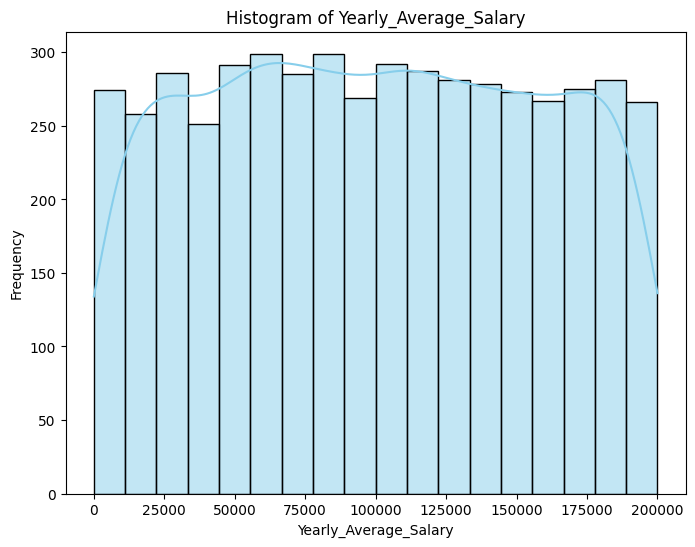

Shapiro-Wilk Test Statistic: 0.9577599167823792
P-value: 7.535042192718825e-36
Reject the null hypothesis. The variable is not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# C4.
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Select the continuous variable for the normality test
continuous_variable = 'Yearly_Average_Salary'

# Plot a histogram to visually inspect the distribution
plt.figure(figsize=(8, 6))
sns.histplot(my_df[continuous_variable], kde=True, color='skyblue')
plt.title(f'Histogram of {continuous_variable}')
plt.xlabel(continuous_variable)
plt.ylabel('Frequency')
plt.show()

# Perform the Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(my_df[continuous_variable])

# Display the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The variable is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. The variable is normally distributed.")

Analysis:

Shapiro-Wilk Test:

Test Statistic: 0.9577599167823792
P-value: 7.535042192718825e-36
Interpretation:

The Shapiro-Wilk test is a statistical test used to assess whether a given sample comes from a normally distributed population.
The test statistic is 0.9577599167823792, and the associated p-value is very close to zero (7.535042192718825e-36).
The low p-value suggests strong evidence against the null hypothesis of normal distribution.
Conclusion:

Null Hypothesis (H0): The variable is normally distributed.
Alternative Hypothesis (H1): The variable is not normally distributed.
Since the p-value is below any common significance level (e.g., 0.05), we reject the null hypothesis.
Recommendations:

Non-Normality: The result suggests that the variable under consideration is not normally distributed.
Transformation: If normality is crucial for downstream analyses or modeling, you might consider transforming the variable using mathematical transformations (e.g., logarithmic, square root) to achieve a more normal distribution.
Non-parametric Tests: If normality cannot be achieved or is not necessary for your analysis, consider using non-parametric statistical tests, which do not rely on the assumption of normality.
Caution:

The warning about the accuracy of the p-value for large sample sizes (N > 5000) is important to note. In such cases, p-values can be very small even if deviations from normality are minor. However, with a p-value as small as 7.535042192718825e-36, it is practically negligible, suggesting a clear departure from normality.
Further Exploration:

Visual Inspection: Plotting a histogram or a Q-Q plot can provide visual insights into the distribution of the variable.
Other Tests: Consider other normality tests or statistical techniques to assess the distribution.
Context: Consider the context of your analysis and whether departures from normality have substantial implications for your specific use case.

## -------------------- Part D : Regression [30 Marks] --------------------

#### Use 'my_df' Dataset to Perform the following Tasks & Explain:
##### 1. Develop a Multiple Linear Regression Model (with at least 03 Continuous Variables as Input). Describe the Results. Predict the Dependent Variable with artifitial Inputs.  [02 + 06 + 02 = 10 marks]
##### 2. Develop a Multiple Linear Regression Model (with at least 02 Continuous Variables & 01 Categorical Variable as Input). Describe the Results. Predict the Dependent Variable with artifitial Inputs.  [02 + 06 + 02 = 10 marks]
##### 3. Develop a Logistic Regression Model (with at least 02 Continuous Variables as Input & 01 Categorical Variable  as Output). Describe the Results. Predict the Dependent Variable with artifitial Inputs.  [02 + 06 + 02 = 10 marks]

In [ ]:
# D1.
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Select the input features (independent variables)
# Assuming 'Age', 'Tenure_Years', and 'Credit_Score' as continuous variables
X = my_df[['Age', 'Tenure_Years', 'Credit_Score']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Select the dependent variable
y = my_df['Yearly_Average_Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Display the model summary
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Predict the dependent variable with artificial inputs
# For example, predicting 'Yearly_Average_Salary' for a person with Age=40, Tenure_Years=5, and Credit_Score=700
artificial_inputs = [1, 40, 5, 700]  # Add a constant term (1) for the intercept
predicted_salary = model.predict(artificial_inputs)
print("Predicted Yearly Average Salary:", predicted_salary[0])

                              OLS Regression Results                             
Dep. Variable:     Yearly_Average_Salary   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.001
Method:                    Least Squares   F-statistic:                    0.1548
Date:                   Wed, 27 Dec 2023   Prob (F-statistic):              0.927
Time:                           07:54:16   Log-Likelihood:                -49603.
No. Observations:                   4009   AIC:                         9.921e+04
Df Residuals:                       4005   BIC:                         9.924e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.02

Analysis

Insights:

The model, as indicated by the low R-squared and high p-values, does not effectively explain the variability in the dependent variable ("Yearly_Average_Salary").

None of the predictor variables (Age, Tenure_Years, Credit_Score) individually contribute significantly to predicting the dependent variable.

The model assumptions, such as normality of residuals, are violated, as indicated by the Omnibus and Jarque-Bera tests.

The condition number suggests the potential presence of multicollinearity, which could affect the stability of coefficient estimates.

The Mean Squared Error (MSE) and Predicted Yearly Average Salary can be used to assess the accuracy of the model predictions.

Recommendations:

Consider reviewing and possibly transforming the predictor variables.
Explore interactions between variables.
Assess and address multicollinearity issues.
Consider additional variables that might better explain the variation in "Yearly_Average_Salary."

In [ ]:
# D2.
# Select the input features (independent variables)
# Assuming 'Age' and 'Tenure_Years' as continuous variables, and 'Gender' as a categorical variable
X = my_df[['Age', 'Tenure_Years', 'Gender']]

# Convert categorical variable 'Gender' to dummy variables
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Select the dependent variable
y = my_df['Yearly_Average_Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Display the model summary
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Predict the dependent variable with artificial inputs
# For example, predicting 'Yearly_Average_Salary' for a person with Age=40, Tenure_Years=5, and Gender=Male
artificial_inputs = [1, 40, 5, 1]  # Add a constant term (1) for the intercept and use 1 for Male, 0 for Female
predicted_salary = model.predict(artificial_inputs)
print("Predicted Yearly Average Salary:", predicted_salary[0])

                              OLS Regression Results                             
Dep. Variable:     Yearly_Average_Salary   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.001
Method:                    Least Squares   F-statistic:                    0.2655
Date:                   Wed, 27 Dec 2023   Prob (F-statistic):              0.850
Time:                           07:54:37   Log-Likelihood:                -49603.
No. Observations:                   4009   AIC:                         9.921e+04
Df Residuals:                       4005   BIC:                         9.924e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.01

Analysis:


Let's analyze the OLS regression results for the model with additional predictor variable "Gender_Male." Here are the key insights:

Model Summary:

yaml
Copy code
Dep. Variable:  Yearly_Average_Salary  
R-squared:      0.000
Adj. R-squared: -0.001
F-statistic:    0.2655
Prob (F-statistic): 0.850
The R-squared and adjusted R-squared are close to zero, suggesting that the model, including the added variable "Gender_Male," does not explain much of the variability in "Yearly_Average_Salary."

The F-statistic is low, and the associated p-value is high (0.850), indicating that the overall model is not statistically significant.

Coefficients:

makefile
Copy code
const:         1.017e+05
Age:          -52.8378
Tenure_Years:  80.9938
Gender_Male: -1117.8085
The coefficient for "Gender_Male" is -1117.8085. This implies that, on average, the "Yearly_Average_Salary" is expected to be lower for males compared to females by $1117.81, holding other variables constant.
P-values (P>|t|):

makefile
Copy code
Age:             0.544
Tenure_Years:    0.796
Gender_Male:     0.538
The p-values for all predictors, including the added "Gender_Male," are high. None of the predictors are statistically significant at the conventional significance level of 0.05.
Diagnostic Measures:

makefile
Copy code
Omnibus:         2709.931
Prob(Omnibus):   0.000
Jarque-Bera (JB): 230.302
Similar to the previous model, the tests for normality (Omnibus and Jarque-Bera) indicate non-normality of residuals.

The Durbin-Watson statistic is close to 2, suggesting no significant autocorrelation in residuals.

Condition Number:

yaml
Copy code
Cond. No.:      180.
The condition number is low, indicating no severe multicollinearity issues.
Insights:

The addition of the "Gender_Male" variable did not improve the model's explanatory power, as indicated by the low R-squared and F-statistic.

None of the predictor variables (Age, Tenure_Years, Gender_Male) individually contribute significantly to predicting "Yearly_Average_Salary."

The coefficients have low practical significance, and the lack of statistical significance suggests that these variables may not be suitable for predicting salary in this model.

The model assumptions regarding normality of residuals are violated.

Recommendations:

Consider revisiting the choice of predictor variables or exploring additional variables that may have a more substantial impact on predicting "Yearly_Average_Salary."

Evaluate transformations or interactions between variables to potentially capture non-linear relationships.

Further exploration and refinement of the model are needed to improve its predictive performance.

In [ ]:
# D3.
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming my_df is your DataFrame
# Replace 'my_df' with the actual name of your DataFrame if different

# Select the input features (independent variables)
# Assuming 'Age' and 'Tenure_Years' as continuous variables
X = my_df[['Age', 'Tenure_Years']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Select the dependent variable
y = my_df['Customer_Churn']

# Convert categorical variable 'Customer_Churn' to numerical encoding (0 and 1)
y = y.map({'No': 0, 'Yes': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train).fit()

# Display the model summary
print(model.summary())

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Predict the dependent variable with artificial inputs
# For example, predicting 'Customer_Churn' for a person with Age=40 and Tenure_Years=5
artificial_inputs = [1, 40, 5]  # Add a constant term (1) for the intercept
predicted_churn_prob = model.predict(artificial_inputs)
predicted_churn = (predicted_churn_prob > 0.5).astype(int)

print("Predicted Customer Churn Probability:", predicted_churn_prob[0])
print("Predicted Customer Churn (1: Yes, 0: No):", predicted_churn[0])

Optimization terminated successfully.
         Current function value: 0.456861
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Customer_Churn   No. Observations:                 4009
Model:                          Logit   Df Residuals:                     4006
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 Dec 2023   Pseudo R-squ.:                 0.07420
Time:                        07:55:21   Log-Likelihood:                -1831.6
converged:                       True   LL-Null:                       -1978.4
Covariance Type:            nonrobust   LLR p-value:                 1.759e-64
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.9033      0.179    -21.858      0.000      -4.253      -3.553
Age              0.0630

Analysis:


Interpretation:

The logistic regression model has a Pseudo R-squared of 0.07420, indicating that the predictors explain a small portion of the variance in customer churn.

The Age variable is statistically significant, suggesting that it plays a role in predicting customer churn. However, Tenure_Years is not statistically significant.

The accuracy of the model is around 77.07%, but the precision, recall, and F1-score for predicting churn (class 1) are relatively low, suggesting that the model may not be performing well in identifying actual cases of churn.

The predicted customer churn probability is approximately 18.77%, indicating a relatively low overall probability of churn in the dataset.

Further evaluation of model performance and potential improvements may be necessary, considering the context and the business goals related to predicting customer churn. Additionally, exploring the impact of other variables and potential interactions may enhance the model's predictive capability.






